# CIFAR-10 Training

### Colab setup option 1, works if files are in "My Drive", skip if running locally.

In [ ]:
# Google mount, skip if running locally.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Google colab setup, skip if running locally.
import sys
from os.path import dirname

# Path to google drive
basepath= mount + 'My Drive/train-using-sion'
output=basepath + '/data/output.csv'
sys.path.append(basepath)

### Colab setup option 2, update from GitHub, skip if running locally

In [3]:
# Clone the entire repo. Skip if cloned.
!git clone -l -s https://github.com/zhangjyr/train-using-sion.git train-using-sion
%cd train-using-sion

Cloning into 'train-using-sion'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 61 (delta 24), reused 48 (delta 14), pack-reused 0
Unpacking objects: 100% (61/61), 262.36 KiB | 6.73 MiB/s, done.
/home/jovyan/train-using-sion


In [4]:
home="/home/jovyan"

In [5]:
import sys
%cd train-using-sion
!git pull
basepath=home+'/train-using-sion'
sys.path.append(basepath)
%mkdir -p '/home/jovyan/data'
output=home+'/data/output.csv'

[Errno 2] No such file or directory: 'train-using-sion'
/home/jovyan/train-using-sion
Already up to date.


### S3 setup, may required by colab running

In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 9.0 MB/s 
     |████████████████████████████████| 79 kB 10.7 MB/s 
     |████████████████████████████████| 8.9 MB 65.2 MB/s 
     |████████████████████████████████| 138 kB 75.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


### Basic training using cpu

In [6]:
import logging_utils
from pytorch_training import train

LOGGER = logging_utils.initialize_logger(True)

ModuleNotFoundError: ignored

In [ ]:
model, testset = train(config={
    "test_mode": False, "epochs": 50, "cpu": False, "model": "resnet",
    # "loader": "s3", "s3_train": "tianium.cifar10.training", "s3_test": "tianium.cifar10.test",
    # "aws_key": "copy from mail", "aws_secret": "copy from mail"
    })

Show training result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


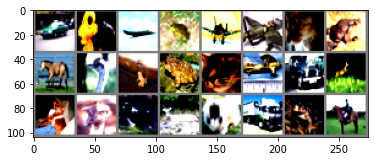

Labels:  tensor([1, 2, 0, 6, 0, 0, 3, 6, 7, 2, 6, 6, 3, 0, 9, 4, 5, 2, 5, 4, 5, 9, 6, 7])
Labels:  car   bird  plane frog  plane plane cat   frog  horse bird  frog  frog  cat   plane truck deer  dog   bird  dog   deer  dog   truck frog  horse

Predictions:  tensor([1, 5, 0, 6, 0, 6, 6, 6, 4, 5, 6, 6, 3, 1, 9, 4, 5, 3, 2, 4, 5, 9, 6, 7])
Predictions:  car   dog   plane frog  plane frog  frog  frog  deer  dog   frog  frog  cat   car   truck deer  dog   cat   bird  deer  dog   truck frog  horse

Predicted 16/24 correctly. Accuracy: 67%.


In [ ]:
from torch.utils.data import DataLoader
from utils import predict_and_display

num_record = 24
test_dataloader = DataLoader(testset, batch_size=num_record, shuffle=True)
images, labels = next(iter(test_dataloader))

predict_and_display(model, images, labels)

Preview output

In [ ]:
!head '/content/data/output.csv'

type,epoch,start,loading,duration,value1,value2
1,0,1655856183.052500,2.843767,6.084602,0.085500,0.415300
2,1,1655856189.140542,2.988078,6.195529,100.000000,782.000000
2,1,1655856195.336448,2.996785,6.226229,200.000000,782.000000
2,1,1655856201.563016,2.978347,6.142835,300.000000,782.000000
2,1,1655856207.706771,3.018944,6.209025,400.000000,782.000000
2,1,1655856213.916145,2.957753,6.133866,500.000000,782.000000
2,1,1655856220.051298,2.971969,6.140094,600.000000,782.000000
2,1,1655856226.191742,3.025527,6.261794,700.000000,782.000000
0,1,1655856189.140531,23.402532,48.457282,0.338600,0.764740


Download output

In [ ]:
from google.colab import files

files.download(output)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>